# Random Ronchigram generator

**Note**: In order to use it on a specific machine, you should build machine interface (setX and get_state functions).


In [8]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import pickle
import numpy as np
from modules.bayes_optimization import BayesOpt, negUCB, negExpImprove
from modules.OnlineGP import OGP
import numpy as np
import importlib
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sys
import os
sys.path.insert(1, '/home/cz489/STEMalign_BO/GPTrelated')
saveResultsQ = False
import scipy
import cv2

### Creat the machine interface

In [26]:
start_point

[[-4.0289872420693875,
  3.379449074988039,
  -5.529261940795277,
  21.46891975200937,
  -0.18809279011379054,
  25.059914259985398]]

In [64]:
ndim = 6 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation
dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
reps = 100  # number of times to repeat the GPT simulation with random status

# upper boundary and lower boundary for H1, H2, S3, S4, S5, S6 determined from Ronchigrams.
# These ranges are pretty large, will generate Ronchigrams that looks terrible without flat area at the boundary.
upper_bound = np.asarray([10,10,5,100,6,80])
lower_bound = np.asarray([-10,-10,-10,-200,-6,-130])

# use 1/4 of the full boundary now
upper_bound = upper_bound / 5
lower_bound = lower_bound / 5
mid = upper_bound + lower_bound

# Run GPT simulation 'reps' times
ronch = []
emit = []
start_point = [[0,0,0,0,0,0]]

for i in range(reps):
    rs = np.random.RandomState()
    for j in range(upper_bound.shape[0]):
        start_point[0][j] = (rs.random() - 0.5) * (upper_bound[j] - lower_bound[j]) + mid[j]
#     print(start_point)
    #creat machine interface
    mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
    mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point) 
    # get emittance from getState() return value
    emit.append(mi.getState()[1][0][0])
    # get ronchigram from saved npy file
    if ~os.path.exists('ronchigram.npy'):
        time.sleep(1)
    temp = np.load('ronchigram.npy')
    temp = temp[50:150,50:150]
    temp = cv2.resize(temp,(128,128))
    ronch.append(temp)
#     plt.imshow(temp)
#     plt.show()
    os.remove('ronchigram.npy')

In [65]:
np.save('128pxRonch_GPToutput.npy',np.asarray(ronch))
np.save('emit_GPToutput.npy',np.asarray(emit))

(-0.5, 200.5, 200.5, -0.5)

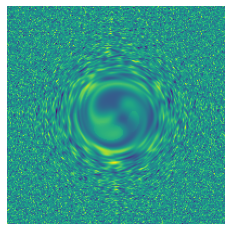

In [63]:
start_point = [[0,0,0,0,0,0]]
mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point) 
mi.getState()
temp = np.load('ronchigram.npy')
plt.imshow(temp)
plt.axis('off')

In [62]:
start_point

array([  0.,   0.,  -1., -20.,   0., -10.])